In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import h5py

%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
random_state = 100
np.random.seed(100)

In [5]:
def load_data():
    trainfile = h5py.File('dataset/train_cat.h5', "r")
    testfile = h5py.File('dataset/test_cat.h5', 'r')
    
    x_train = np.array(trainfile['train_set_x'][:])
    y_train = np.array(trainfile['train_set_y'][:])
    
    x_test = np.array(testfile['test_set_x'][:])
    y_test = np.array(testfile['test_set_y'][:])
    
    return x_train, x_test, y_train.reshape(1,y_train.shape[0]), y_test.reshape(1, y_test.shape[0])

In [6]:
x_train, x_test, y_train, y_test = load_data()
print("Dataset with Xtrain(shape : {0}) and Ytrain(shape : {1})".format(x_train.shape, y_train.shape))

Dataset with Xtrain(shape : (209, 64, 64, 3)) and Ytrain(shape : (1, 209))


Image is Cat


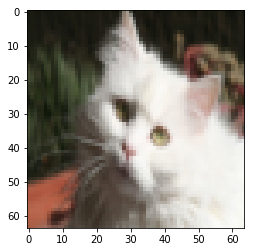

In [7]:
example_num = 102
plt.imshow(x_train[example_num])
print("Image is", 'Cat' if y_train[:,example_num] == 1 else 'Not Cat')

# Unfold RGB image 

In [8]:
x_train_unfolded, x_test_unfolded = x_train.reshape(x_train.shape[0],64*64*3).T, x_test.reshape(x_test.shape[0],64*64*3).T

In [9]:
x_train.shape

(209, 64, 64, 3)

In [10]:
 x_train.reshape(x_train.shape[0],-1).T.shape

(12288, 209)

In [11]:
x_train_unfolded.shape

(12288, 209)

Image is Cat


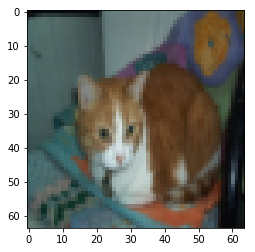

In [12]:
example = 134
plt.imshow(x_train[example].reshape(64,64,3))
print("Image is {0}".format('Cat' if (y_train[:,example] == 1) else 'Not Cat'))

In [13]:
print("Training dataset with Xtrain(shape : {0}) and Ytrain(shape : {1})".format(x_train_unfolded.shape, y_train.shape))
print("Testing dataset with Xtest(shape : {0}) and Ytest(shape : {1})".format(x_test_unfolded.shape, y_test.shape))

Training dataset with Xtrain(shape : (12288, 209)) and Ytrain(shape : (1, 209))
Testing dataset with Xtest(shape : (12288, 50)) and Ytest(shape : (1, 50))


#### Noramalize data

In [14]:
x_train_norm, x_test_norm = x_train_unfolded/255, x_test_unfolded/255

In [15]:
print("Training dataset with Xtrain(shape : {0}) and Ytrain(shape : {1})".format(x_train_unfolded.shape, y_train.shape))
print("Testing dataset with Xtest(shape : {0}) and Ytest(shape : {1})".format(x_test_unfolded.shape, y_test.shape))

Training dataset with Xtrain(shape : (12288, 209)) and Ytrain(shape : (1, 209))
Testing dataset with Xtest(shape : (12288, 50)) and Ytest(shape : (1, 50))


In [16]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [17]:
def forward(W,b,X,Y):
    """
    Forward prop.
    """
    z = np.dot(W.T,X) + b
    yhat = sigmoid(z)
    #print("yhat shape:", yhat.shape)
    return yhat

In [18]:
def backward(W,b,X,Y, yhat):
    """ Backward prop """
    #print("shapes: w,x,y,yhat", W.shape, X.shape,Y.shape,yhat.shape)
    m = X.shape[1]
    cost = - ( (1/m) * np.sum( (Y*np.log(yhat)) + ((1 - Y)*np.log((1 - yhat))) ) )   # cost over all examples
    #print("shapes: w,x,y,yhat", W.shape, X.shape,Y.shape,yhat.shape)
    dW = (1/m) * np.dot(X,(yhat - Y).T)
    db = (1/m) * np.sum((yhat - Y))
    return dW, db, np.squeeze(cost)

In [19]:
def learn(W, b, X, Y, learning_rate=0.01, num_iterations=1000, print_error = False):
    """ learn by iterating over training set """

    costs = []

    for i in range(num_iterations):
        yhat = forward(W,b,X,Y)
        dW,db, cost = backward(W,b,X,Y, yhat)

        #update weights
        W = W - (learning_rate * dW)
        b = b - (learning_rate * db)
        assert(dW.shape == W.shape)
        if( i%100 == 0):
            costs.append(cost)

        if print_error and i%100 == 0:
            print("error after iteration {0} is {1}".format(i, cost))


    parameters = {
        "W":W,
        "b":b
    }

    gradients = {
        "dW":dW,
        "db":db
    }

    return parameters, gradients, costs

In [20]:
def predict(W,b,X):
    """ Predicts output """

    m = X.shape[1]

    predictions = np.zeros((1,m))
    W = W.reshape(X.shape[0], 1)
    yHat = sigmoid(np.dot(W.T, X) + b)
    
    for i in range(yHat.shape[1]):
        if yHat[0,i] <= 0.5 :
            predictions[0,i] = 0
        else:
            predictions[0,i] = 1
    
    return predictions

In [21]:
def model(x_train, y_train, x_test, y_test, learning_rate=0.001, num_iterations = 10000, print_error=False):
    
    W = np.zeros((x_train.shape[0],1))
    b = 0
    params, grads, costs = learn(W,b,x_train,y_train, learning_rate=0.01, num_iterations=num_iterations, print_error = print_error)
     
    train_pred = predict(params["W"], params["b"], x_train)
    test_pred = predict(params["W"], params["b"], x_test)
    
    print("training accuracy: {0} %".format(100-np.mean(np.abs(train_pred - y_train)) * 100))
    print("testing accuracy: {0} %".format(100-np.mean(np.abs(test_pred - y_test)) * 100))
    
    return costs,params

In [22]:
costs, params = model(x_train_norm, y_train, x_test_norm, y_test, learning_rate=0.01, num_iterations = 1000, print_error=True)

error after iteration 0 is 0.6931471805599453
error after iteration 100 is 0.8239208681601369
error after iteration 200 is 0.41894372058616236
error after iteration 300 is 0.6173497063912884
error after iteration 400 is 0.522115767197924
error after iteration 500 is 0.3877087459646933
error after iteration 600 is 0.23625445652290003
error after iteration 700 is 0.15422213305621676
error after iteration 800 is 0.1353278283265459
error after iteration 900 is 0.12497148001124604
training accuracy: 98.56459330143541 %
testing accuracy: 70.0 %


In [23]:
y_test.mean()

0.66000000000000003

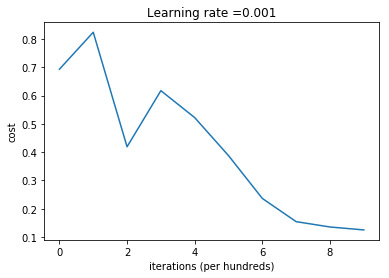

In [24]:
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.001))
plt.show()

In [ ]:
from PIL import Image
from scipy import ndimage
import scipy

In [ ]:
num_px=64
num_channel = 0
fname = "AZ_NB.PNG"
image = np.array(ndimage.imread(fname, flatten=False))
img = np.array(scipy.misc.imresize(image, size=(num_px,num_px)))
num_channel = img.shape[2]

In [ ]:
_t = img.reshape(64*64*3,1)
plt.imshow(img)

In [ ]:
_t.shape

In [ ]:
predict(params["W"], params["b"],_t)